In [5]:
import cifar10
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
import time


In [6]:
cifar10.data_path = "data/CIFAR-10/"

In [7]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [8]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


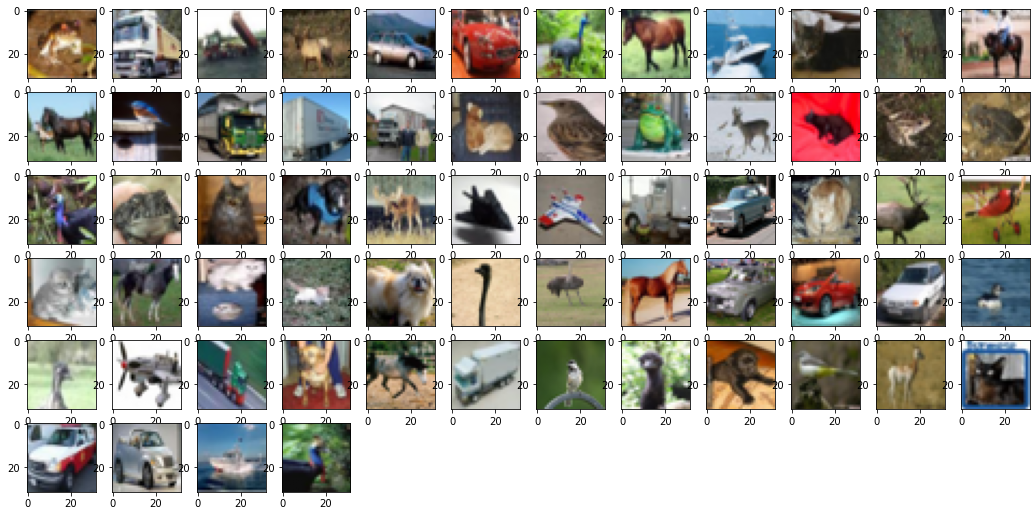

In [4]:
## plotting these images
fig = plt.figure(figsize = (18,18))
for i in range(64):
    ax = fig.add_subplot(12, 12, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()



In [5]:

images_train.shape
images_test.shape

(10000, 32, 32, 3)

In [5]:
x_train = images_train.reshape((50000 ,32*32*3))
y_train = cls_train
x_test = images_test.reshape((10000, 32*32*3))
y_test = cls_test

## Preparing Different variance values

In [8]:
pca_k = PCA(whiten = True)
pca_k.fit(x_train)

PCA(whiten=True)

In [9]:
k = 0
total = 0
while total < 0.95:
    total += pca_k.explained_variance_ratio_[k]
    k += 1
    
k

217

In [10]:
pca_cifar_95 = PCA(n_components = k, whiten = True)
x_transform_95 = pca_cifar_95.fit_transform(x_train)

In [11]:
x_transform_95.shape

(50000, 217)

In [12]:
k = 0
total = 0
while total < 0.99:
    total += pca_k.explained_variance_ratio_[k]
    k += 1
    
k

658

In [13]:
pca_cifar_99 = PCA(n_components = k, whiten = True)
x_transform_99 = pca_cifar_99.fit_transform(x_train)

In [14]:
x_transform_99.shape

(50000, 658)

In [15]:
k = 0
total = 0
while total < 0.80:
    total += pca_k.explained_variance_ratio_[k]
    k += 1
    
k

33

In [16]:
pca_cifar_80 = PCA(n_components = k, whiten = True)
x_transform_80 = pca_cifar_80.fit_transform(x_train)

In [17]:
x_transform_80.shape

(50000, 33)

In [18]:
k = 0
total = 0
while total < 0.75:
    total += pca_k.explained_variance_ratio_[k]
    k += 1
    
k

21

In [19]:
pca_cifar_75 = PCA(n_components = k, whiten = True)
x_transform_75 = pca_cifar_75.fit_transform(x_train)

In [20]:
x_transform_75.shape

(50000, 21)

## Fitting tesing data 


In [21]:
x_test_95 = pca_cifar_95.transform(x_test)

In [22]:
x_test_95.shape

(10000, 217)

In [23]:
x_test_99 = pca_cifar_99.transform(x_test)

In [24]:
x_test_99.shape

(10000, 658)

In [25]:
x_test_80 = pca_cifar_80.transform(x_test)

In [26]:
x_test_80.shape

(10000, 33)

In [27]:
x_test_75 = pca_cifar_75.transform(x_test)

In [28]:
x_test_75.shape

(10000, 21)

-----------------------------------------------------------------------------

## NOW APPLYING CLASSIFIER

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()

In [21]:
clf.fit(x_train_transform, y_train)


LogisticRegression()

In [22]:
clf.score(x_train_transform, y_train)

0.45294

In [23]:
y = clf.predict(x_test_transform)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y))

0.4022


## APPLYING KNN CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
clf = KNeighborsClassifier()

In [27]:
clf.fit(x_train_transform, y_train)


KNeighborsClassifier()

In [28]:
clf.score(x_test_transform, y_test)

0.1448

In [29]:
print(accuracy_score(y_test, y))

0.4025


## APPLYING SVM

In [42]:
from sklearn import svm, datasets

clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train_transform, y_train)

SVC()

In [17]:
clf.score(x_test_transform, y_test)

0.5345

In [43]:
y_pred = clf.predict(x_test_transform)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5334

In [46]:
labels_test
cls_test

array([3, 8, 8, ..., 5, 1, 7])

In [51]:
labels_test[0]
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [53]:
labels_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [54]:
d = {}
j = 0
for i in class_names:
    d[j] = i
    j += 1
    
d

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [55]:
pred = []
for i in y_pred:
    k = d[i]
    pred.append(k)
pred

['cat',
 'ship',
 'ship',
 'airplane',
 'deer',
 'frog',
 'cat',
 'deer',
 'cat',
 'automobile',
 'ship',
 'automobile',
 'dog',
 'horse',
 'truck',
 'dog',
 'dog',
 'deer',
 'ship',
 'horse',
 'truck',
 'airplane',
 'airplane',
 'truck',
 'deer',
 'bird',
 'deer',
 'deer',
 'truck',
 'frog',
 'frog',
 'bird',
 'ship',
 'cat',
 'truck',
 'automobile',
 'frog',
 'truck',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'deer',
 'truck',
 'truck',
 'cat',
 'ship',
 'deer',
 'deer',
 'truck',
 'ship',
 'frog',
 'cat',
 'ship',
 'ship',
 'horse',
 'horse',
 'cat',
 'deer',
 'deer',
 'cat',
 'automobile',
 'truck',
 'frog',
 'bird',
 'automobile',
 'airplane',
 'cat',
 'truck',
 'deer',
 'frog',
 'ship',
 'ship',
 'airplane',
 'deer',
 'truck',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'horse',
 'cat',
 'ship',
 'ship',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'dog',
 'frog',
 'airplane',
 'airplane',
 'truck',
 'dog',
 'horse',
 'fro

## RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier()
rf.fit(x_transform_99 ,y_train)
predict = rf.predict(x_test_)

In [99]:
accuracy_score(y_test, predict)

0.3866

## SVM 


In [27]:
from sklearn import svm, datasets

clf = svm.SVC(kernel = 'rbf')
clf.fit(x_transform_95, y_train)

SVC()

In [28]:
y1 = clf.predict(x_test_95)

## svm rbf with 95 gives best till now with 0.5525

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y1)

0.5529

In [31]:
d1 = {}
j = 0
for i in class_names:
    d1[j] = i
    j += 1
    
d1

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [32]:
pred1 = []
for i in y1:
    k = d1[i]
    pred1.append(k)
pred1

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'ship',
 'truck',
 'bird',
 'horse',
 'truck',
 'ship',
 'dog',
 'cat',
 'ship',
 'frog',
 'horse',
 'airplane',
 'airplane',
 'truck',
 'deer',
 'frog',
 'bird',
 'airplane',
 'truck',
 'frog',
 'frog',
 'deer',
 'bird',
 'bird',
 'truck',
 'automobile',
 'deer',
 'truck',
 'automobile',
 'dog',
 'deer',
 'frog',
 'cat',
 'frog',
 'airplane',
 'truck',
 'dog',
 'ship',
 'deer',
 'frog',
 'truck',
 'ship',
 'frog',
 'cat',
 'ship',
 'ship',
 'horse',
 'ship',
 'dog',
 'bird',
 'horse',
 'cat',
 'frog',
 'truck',
 'frog',
 'bird',
 'automobile',
 'ship',
 'dog',
 'truck',
 'bird',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'cat',
 'airplane',
 'horse',
 'bird',
 'ship',
 'ship',
 'truck',
 'airplane',
 'deer',
 'ship',
 'frog',
 'deer',
 'dog',
 'frog',
 'airplane',
 'horse',
 'horse',
 'deer',
 'deer',


In [35]:
import numpy as np
np.savetxt("answers.csv", pred1, delimiter=',', fmt="%s")

## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

In [131]:
clf.fit(x_transform_80, y_train)


KNeighborsClassifier()

In [132]:
y2 = clf.predict(x_test_80)

In [133]:
print(accuracy_score(y_test, y2))

0.407


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() ## creating classifier.


In [34]:
clf.fit(x_transform_95, y_train)

LogisticRegression()

In [35]:
y3 = clf.predict(x_test_95)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y3)

0.4062